In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

In [23]:
df=pd.read_csv('data/avocado.csv')

In [24]:
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Data Cleansing

In [25]:
del df['Unnamed: 0']
# or use- df = df.reset_index(drop=True)
df['Date']=pd.to_datetime(avocado['Date'])
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
df.isnull().sum()

## Need to explore a few null values in XLarge and Large bags are not showing up

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


## Data analysis

In [30]:
print(df.type.nunique()) #number of different types
print(df.year.nunique()) #number of different year
print(df.region.nunique()) #number of different regions

2
4
54


In [12]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [31]:
df_date=df.groupby('Date').mean()

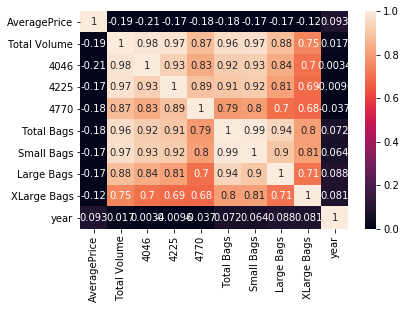

In [26]:
sns.heatmap(df.corr(),vmax = 1, vmin = 0,annot = True)
plt.show()

In [33]:
df.region.value_counts()

Boston                 338
LosAngeles             338
Southeast              338
NewYork                338
SanDiego               338
Columbus               338
Seattle                338
HartfordSpringfield    338
Chicago                338
Northeast              338
GrandRapids            338
Nashville              338
Indianapolis           338
Orlando                338
Pittsburgh             338
Portland               338
RichmondNorfolk        338
NewOrleansMobile       338
Philadelphia           338
StLouis                338
SanFrancisco           338
Spokane                338
Atlanta                338
Detroit                338
RaleighGreensboro      338
Roanoke                338
BuffaloRochester       338
Charlotte              338
Sacramento             338
DallasFtWorth          338
SouthCarolina          338
Denver                 338
California             338
Plains                 338
Tampa                  338
Houston                338
Boise                  338
S

## Data Visualization

### Basic plots

Text(0,0.5,'Average Price')

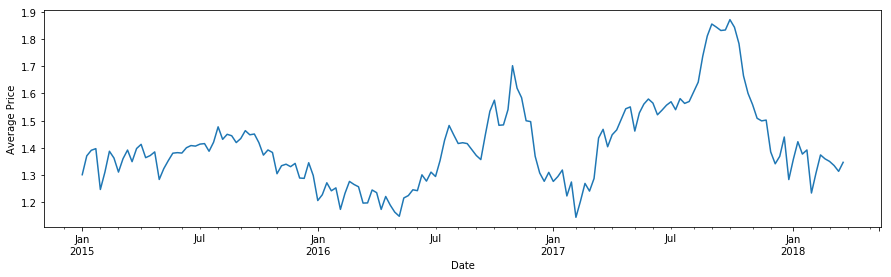

In [14]:
df_date.AveragePrice.plot(figsize=(15,4))
plt.ylabel('Average Price')

C:\Users\megha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


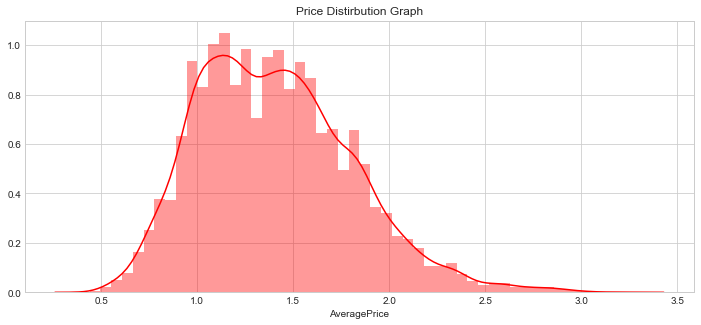

In [73]:
plt.figure(figsize=(12,5))
plt.title("Price Distirbution Graph")
ax = sns.distplot(df["AveragePrice"], color = 'r')


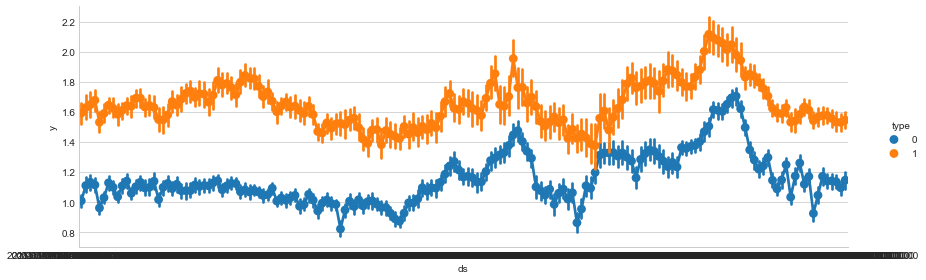

In [149]:
ax=sns.factorplot(x='Date', y='AveragePrice', data=df, hue='type',aspect=3)

Text(0,0.5,'Average Price')

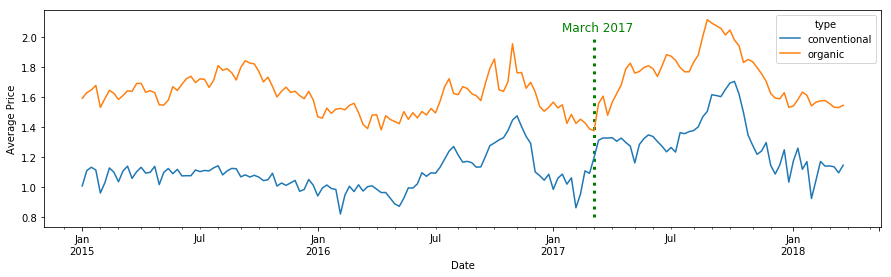

In [16]:
df_date_t=df.pivot_table(index='Date', columns='type', aggfunc='mean')['AveragePrice']
df_date_t.plot(figsize=(15,4))
plt.text(x='2017-1-15', y=2.04, s='March 2017', color='green', fontsize=12)
plt.vlines(x='2017-3-1', ymin=0.8, ymax=2, color='green', linestyles=':', linewidth=3, label='March 2017')
plt.ylabel('Average Price')

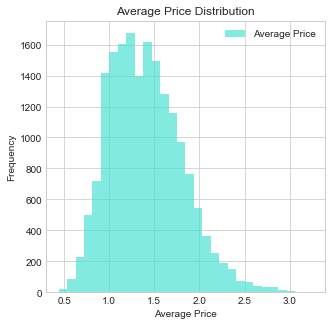

In [56]:
#Histogram

avocado["AveragePrice"].plot(kind="hist",color="Turquoise",bins=30,grid=True,alpha=0.65,label="Average Price",figsize=(5,5))
plt.legend()
plt.xlabel("Average Price")
plt.title("Average Price Distribution")
plt.show()

conventional    9126
organic         9123
Name: type, dtype: int64


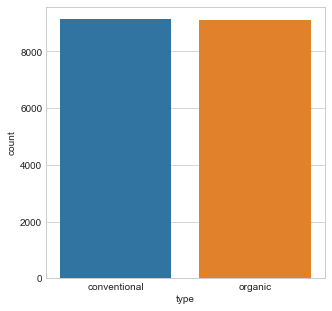

In [83]:
"""" 2 methods of doing the same thing:
df.type.value_counts().plot(kind = 'bar')
plt.show()
df.type.value_counts()"""

print(df['type'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df['type'])
plt.show()


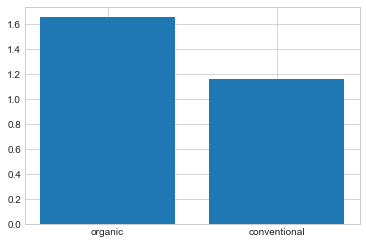

In [58]:
index = np.arange(2)
objects = ['organic','conventional']
plt.bar(index,[df[df.type == "organic"].AveragePrice.mean(), df[df.type == "conventional"].AveragePrice.mean()])
plt.xticks(index,objects)
plt.show()

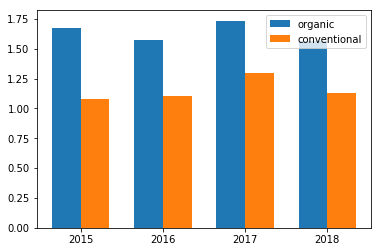

In [44]:
datayearorganic = []
datayearconventional = []
for i in df.year.unique():
    datayearorganic.append(df[(df.year == i) & (df['type'] == 'organic')].AveragePrice.mean())
    datayearconventional.append(df[(df.year == i) & (df.type == 'conventional')].AveragePrice.mean())
bar_width = 0.35
plt.bar(np.arange(df.year.nunique()),datayearorganic,bar_width, label = 'organic')
plt.bar(np.arange(df.year.nunique())+bar_width,datayearconventional,bar_width, label = 'conventional')
plt.xticks(np.arange(df.year.nunique())+bar_width/2,df.year.unique())
plt.legend()
plt.show()

## ViolinPlot

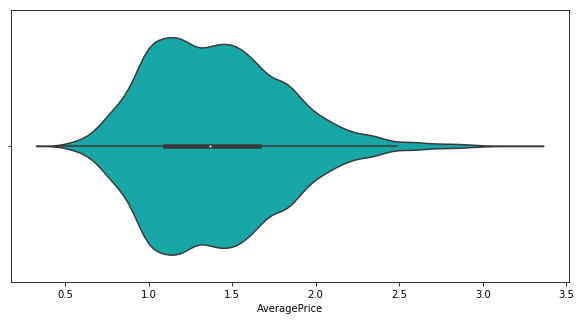

In [40]:
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.violinplot(df.dropna(subset = ['AveragePrice']).AveragePrice, color = 'c')

## Boxplot

Boxplots are efficient as they display outliers clearly.

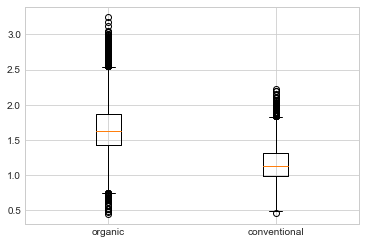

In [75]:
objects = ['organic','conventional']
plt.boxplot([df[df.type == "organic"].AveragePrice,df[df.type == "conventional"].AveragePrice])
plt.xticks([1,2],objects)
plt.show()

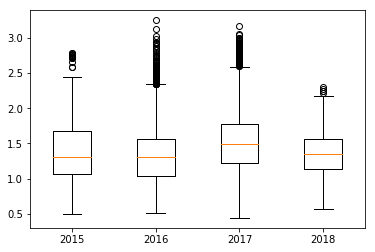

In [43]:
datayear = []
for i in df.year.unique():
    datayear.append(df[df.year == i].AveragePrice)
plt.boxplot(datayear)
plt.xticks(range(1,df.year.nunique()+1),df.year.unique())
plt.show()

## Pointplots

Text(0.5,1,'Yearly Average Price in Each Region')

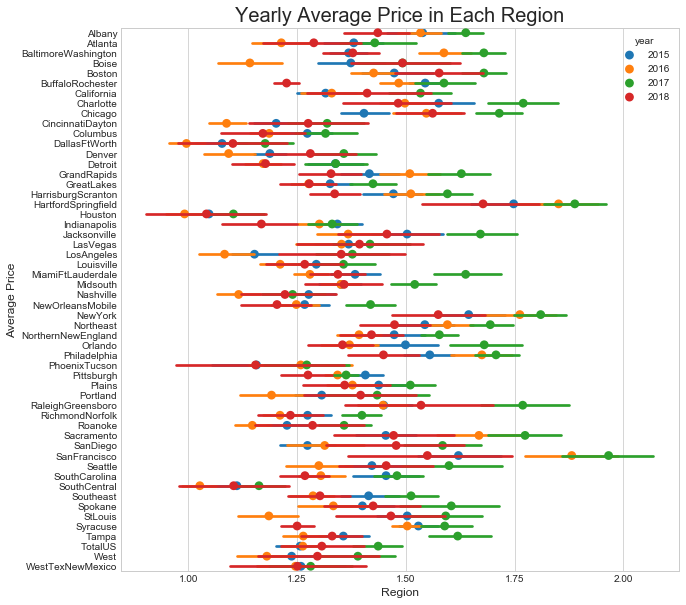

In [63]:
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=df, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Average Price',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

Text(0.5,1,'Type Average Price in Each Region')

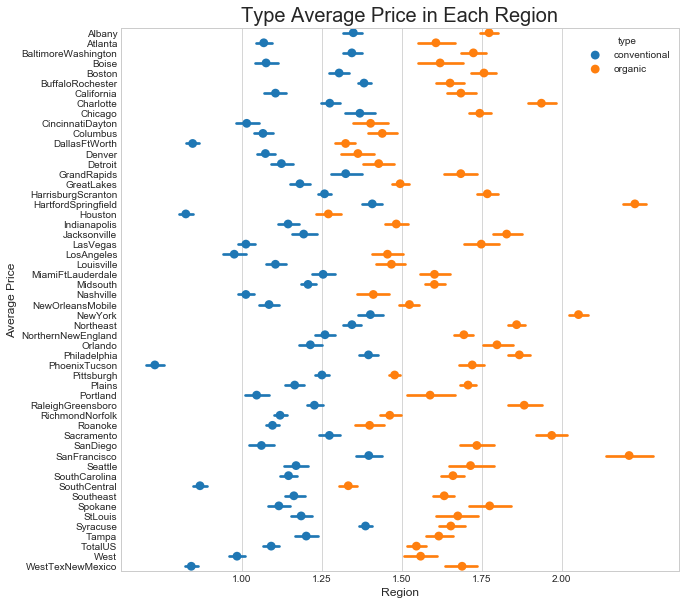

In [68]:
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=df, hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Average Price',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20})

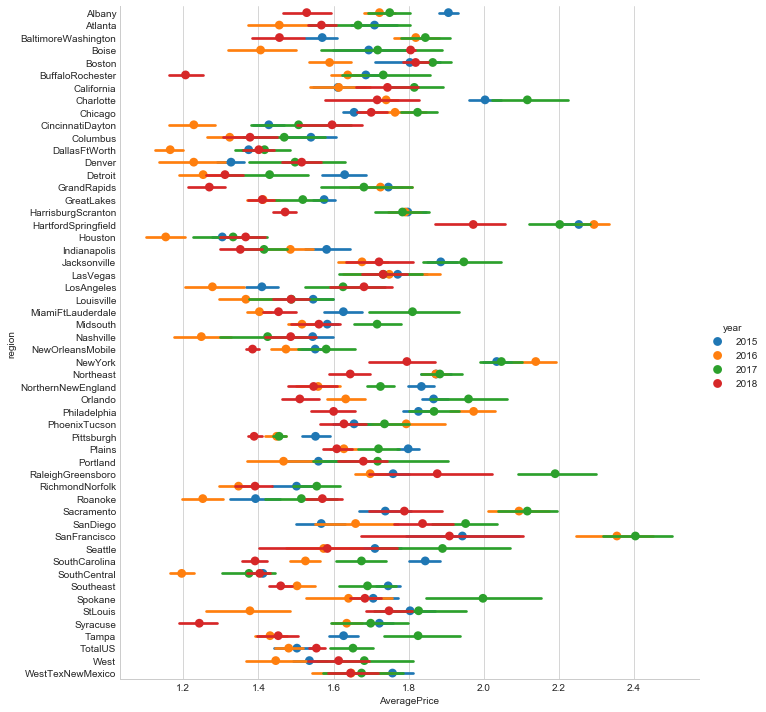

In [78]:
#Price broken down by year and region/state (Organic)
mask = df['type']=='organic'
g = sns.factorplot('AveragePrice','region', data= df[mask],hue='year',size=10,aspect=1,join=False,)

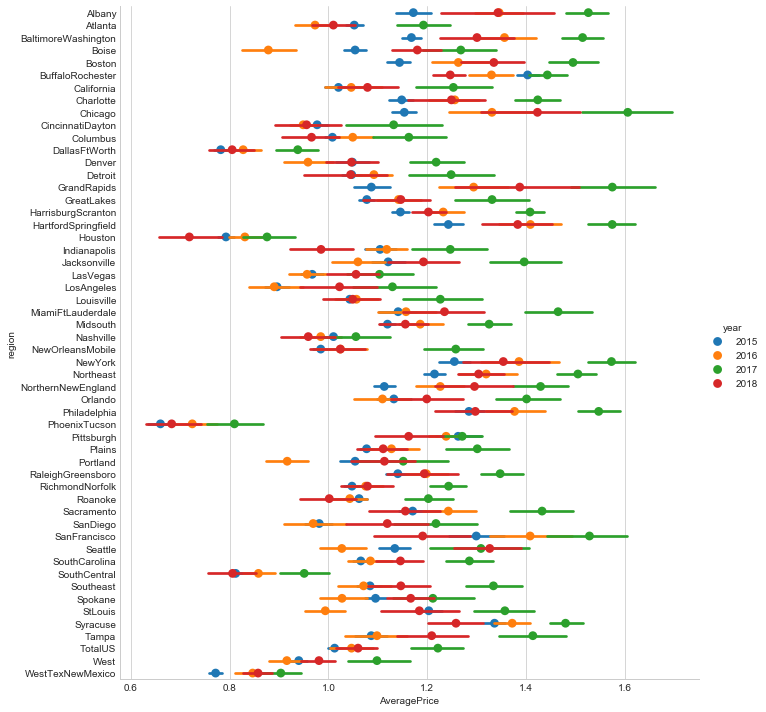

In [79]:
#Price broken down by year and region/state (Conventional)
mask = df['type']=='conventional'
g = sns.factorplot('AveragePrice','region', data= df[mask], hue='year', size=10, aspect=1, join=False)

## Barplots

Text(0.5,1,'Average Price of Avocado According to Region')

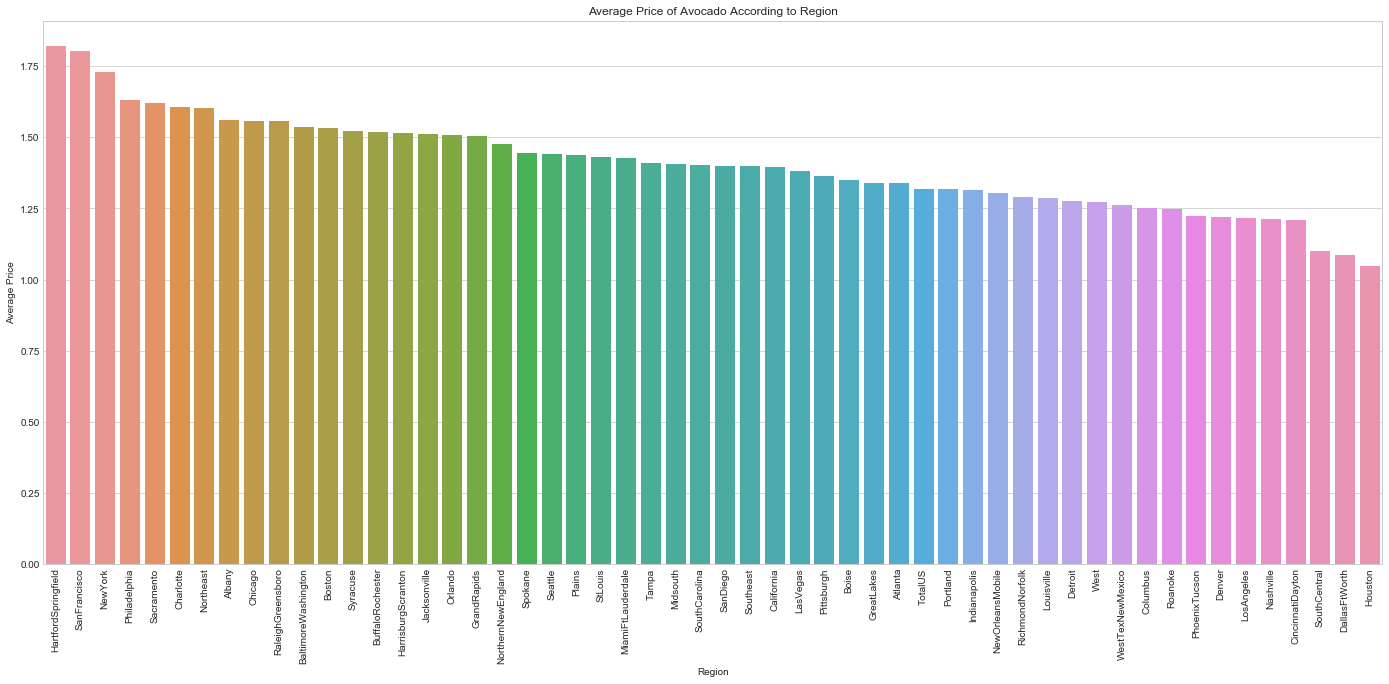

In [88]:
df.groupby(['region','year'],as_index=False)['Total Volume'].agg('mean')
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Text(0.5,1,'Average of Total Volume According to Region')

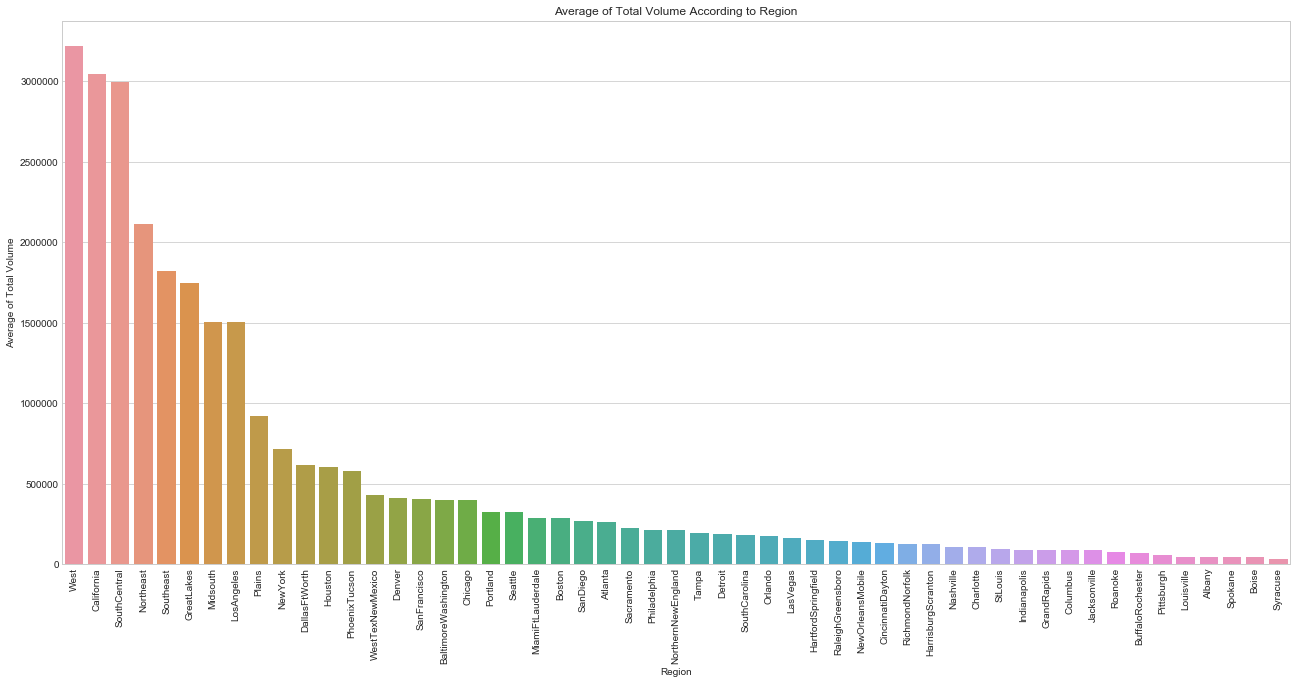

In [87]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

In [ ]:
For forecasting, RandomForestClassifier has the highest accuracy. 
However, logistic regression and KNeighborsClassifier will also help to know what type of avocado is in front of us.

In [93]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(df.type.drop_duplicates()) 
dicts['type'] = list(label.classes_)
df.type = label.transform(df.type) 

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

x = df.drop(['type','region','Date'], axis = 1)
y = df.type

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [96]:
logreg =  LogisticRegression(penalty='l1', tol=0.0001).fit(x_train,y_train)
print("LogisticRegression train data score:{:.3f}".
     format(logreg.score(x_train,y_train)))
print("LogisticRegression test data score:{:.3f}".
     format(logreg.score(x_test,y_test)))

LogisticRegression train data score:0.947
LogisticRegression test data score:0.947


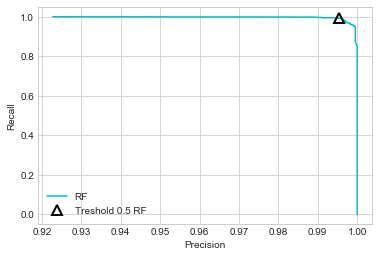

In [99]:
rf =  RandomForestClassifier(n_estimators = 100, random_state = 0, max_features = 2)
rf.fit(x_train,y_train)
precision_rf,recall_rf,thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(x_test)[:,1])

plt.plot(precision_rf,recall_rf,label = 'RF', color = 'c')
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf],
        recall_rf[close_default_rf],'^',c = 'k', markersize = 10,
        label = "Treshold 0.5 RF", fillstyle = "none", mew = 2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc = "best")

In [100]:
from sklearn.metrics import average_precision_score
p_rf = average_precision_score(y_test,rf.predict_proba(x_test)[:,1])
print("Average precision score Random Forest Classifier: {:.3f}".
     format(p_rf))

Average precision score Random Forest Classifier: 1.000


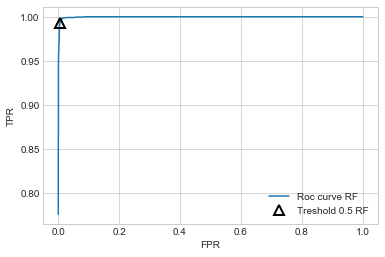

In [101]:
fpr_rf,tpr_rf,thresholds_rf = roc_curve(y_test,rf.predict_proba(x_test)[:,1])
plt.plot(fpr_rf,tpr_rf, label = "Roc curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf],
        tpr_rf[close_default_rf],'^', markersize = 10,
        label = "Treshold 0.5 RF", fillstyle = "none", c = 'k', mew = 2)
plt.legend(loc = 4)

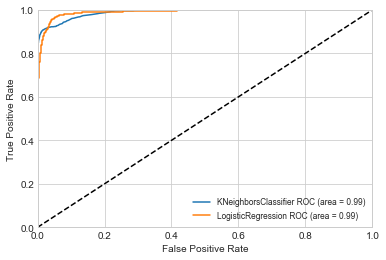

In [103]:
kfold = 7 
result = {} 
trn_train, trn_test, trg_train, trg_test = model_selection.train_test_split(x, y, test_size=0.25) 
knn = KNeighborsClassifier(n_neighbors = 200) 
log_reg = LogisticRegression(penalty='l1', tol=0.001) 
scores = model_selection.cross_val_score(knn, x, y, cv = kfold)
result['KNeighborsClassifier'] = scores.mean()
scores = cross_validation.cross_val_score(log_reg, x, y, cv = kfold)
result['LogisticRegression'] = scores.mean()
plt.clf()

knn_result = knn.fit(trn_train, trg_train).predict_proba(trn_test)
fpr, tpr, thresholds = roc_curve(trg_test, knn_result[:, 1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('KNeighborsClassifier',roc_auc))

logreg_result = log_reg.fit(trn_train, trg_train).predict_proba(trn_test)
fpr, tpr, thresholds = roc_curve(trg_test, logreg_result[:, 1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LogisticRegression',roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')


### Alternate method - Timeseries Forecast

Prophet is an excellent function to generate quick and accurate timeseries forecast in python and R.

In [137]:
df = df.rename(columns={'Date': 'ds','AveragePrice': 'y'})
df.head()

,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,week,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,52,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,51,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,50,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,49,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,48,11


In [138]:
from fbprophet import Prophet

my_model = Prophet()
my_model.fit(df)

future_dates = my_model.make_future_dataframe(periods=900)
forecast =my_model.predict(future_dates)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


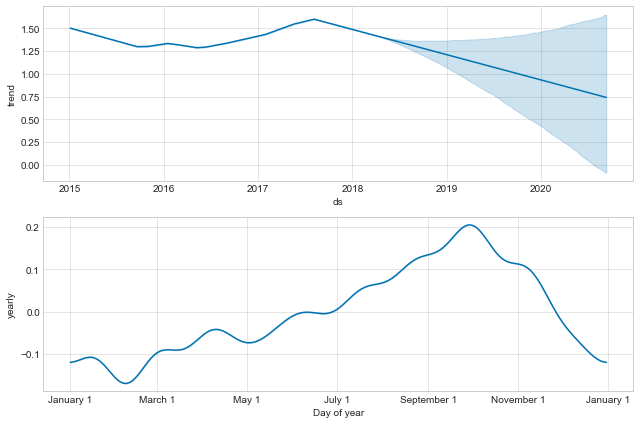

In [139]:
fig2 = my_model.plot_components(forecast)

In [140]:
forecastnew = forecast['ds']
forecastnew2 = forecast['yhat']

forecastnew = pd.concat([forecastnew,forecastnew2], axis=1)

mask = (forecastnew['ds'] > "2018-03-24") & (forecastnew['ds'] <= "2020-09-10")
forecastedvalues = forecastnew.loc[mask]

mask = (forecastnew['ds'] > "2015-01-04") & (forecastnew['ds'] <= "2018-03-25")
forecastnew = forecastnew.loc[mask]

Red = Predicted Values, Blue = Base Values


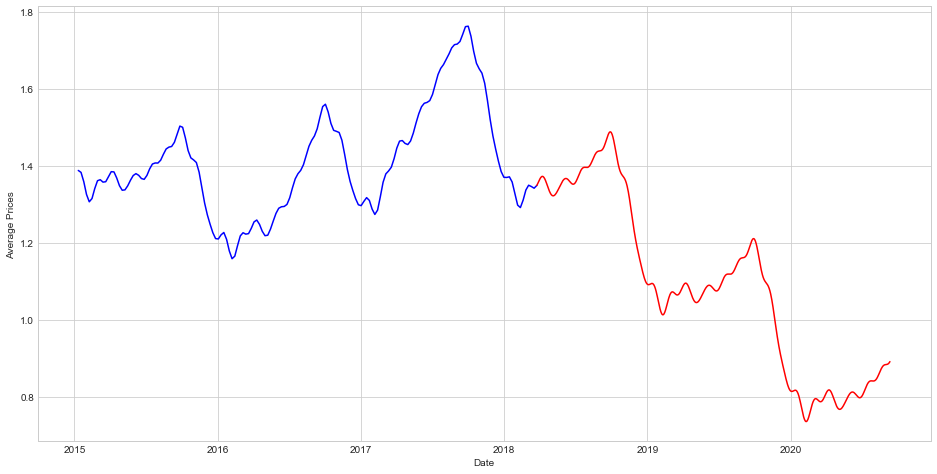

In [141]:
fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.plot(forecastnew.set_index('ds'), color='b')
ax1.plot(forecastedvalues.set_index('ds'), color='r')
ax1.set_ylabel('Average Prices')
ax1.set_xlabel('Date')
print("Red = Predicted Values, Blue = Base Values")

#### Good news! As per the above forecast, the Hass avocado prices will go down in 2019 and 2020.

### Alternate method - Linear Regression


###### Just for reference - not executed

#df['Year'], df['Month'],  df['Day'] = df['Date'].str.split('-').str

df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['year'] = pd.DatetimeIndex(df['Date']).year
df['week'] = pd.DatetimeIndex(df['Date']).week

week=[]
for i in df['Date']:
    week.append(i.isocalendar()[1])
df['week']=week
year2015=df.loc[df['year']==2015]
year2015=year2015.pivot_table(index='week', columns='type', aggfunc='mean')['AveragePrice']
for i in df.index:
    if (df['week'].loc[i]==53) & (df['month'].loc[i]=='January'):
        df['week'].loc[i]=1
        
for i in df.index:
    if (df['week'].loc[i]==52) & (df['month'].loc[i]=='January'):
        df['week'].loc[i]=1
        
        

d=[]
for i in df.index:
    a=df['week'].loc[i]
    if df['type'].loc[i]=='conventional':
        d.append(year2015['conventional'].loc[a])
    else:
        d.append(year2015['organic'].loc[a])
df['base_price']=d
df['delta']=df['AveragePrice']-df['base_price']
df_modeling=df.drop(['Date', 'AveragePrice', 'year','region', 'month', 'base_price', 'Revenue indiv', 'Revenue Bagged', 'Revenue Total','Total indiv', 'Total Bags'], axis=1)

type_dum=pd.get_dummies(df_modeling['type'])
class_dum=pd.get_dummies(df_modeling['class'])
df_modeling=pd.concat([df_modeling, type_dum], axis=1)
df_modeling=pd.concat([df_modeling, class_dum], axis=1)
df_modeling.head()

from sklearn.model_selection import train_test_split
X_multi=df_modeling.drop('delta', axis=1)
Y=df_modeling['delta']
X_train, X_test, Y_train, Y_test = train_test_split(X_multi, Y)
lreg=LinearRegression()
lreg.fit(X_train, Y_train)

coef=DataFrame(lreg.coef_)
features=DataFrame(X_multi.columns)
line1=pd.concat([features, coef], axis=1)
line1.columns=['feature', 'coefficient']
line1.index=line1['feature']
line1.sort_values(by='coefficient').plot(kind='bar')

pred_train=lreg.predict(X_train)
pred_test=lreg.predict(X_test)
plt.scatter(x=Y_test, y=pred_test, marker='.')
plt.plot(Y_test, Y_test, color='red')
plt.title('test data')

resid=Y_train-pred_train
resid2=Y_test-pred_test
train=plt.scatter(x=Y_train, y=resid, alpha=0.5)
test=plt.scatter(x=Y_test, y=resid2, marker='x', alpha=0.5)
line=plt.hlines(y=0, xmin=-1.5, xmax=1.5, color='red')
plt.legend((train,test), ('Training', 'Test'), loc='lower right')
plt.ylabel('residual')
plt.xlabel('delta')